# Problem Statment

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

# Business Understanding

Car is a system which has input features such as enginesize,body,engine locaton,Brand of car output performance are messured by such as peak rpm,city mpg,horsepower ,highway mpg,symboling we have to best establish relation between them to predict price of car!

# Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Analysis Process
    1.Data Understanding
    2.Data cleaning -duplicates check,null value check,outlier check
    3.EDA - univariate Analysis, Bivariate Analysis
    4.Feature Enginerring
    5.Train test split
    6.Model Building
    7.Model Evaluation
    8.Final conclusion

In [1]:
# import packages
import pandas as pd
import numpy as np

In [2]:
# Reading and understanding the data
cars=pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Basic checks

In [3]:
print("Number of Rows in dataset",cars.shape[0])
print("Number of columns in dataset",cars.shape[1])

Number of Rows in dataset 205
Number of columns in dataset 26


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Data cleaning

In [5]:
# null values check
cars.isnull().sum()
# no null values found in datase

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# duplicate checks
cars.duplicated().sum()
#cars=cars.drop_duplicate()

0

No duplicates records found

In [7]:
# Descriptive statistics
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
cars.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [9]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
cars.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [10]:
cars['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [11]:
cars['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [12]:
cars.insert(2,'car_company',cars['CarName'].apply(lambda x:x.split()[0]))

In [13]:
cars.head()

,car_ID,symboling,car_company,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
# 1.drop the car_id column as it has the unique values
# 2.drop the car_name column as we have drived the new feature car_company
cars.drop(['car_ID','CarName'],axis=1,inplace=True)

In [15]:
cars.head()

,symboling,car_company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
# correcting the miss-type company name
cars['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)
cars['car_company'].replace(['toyouta'],'toyota',inplace=True)
cars['car_company'].replace(['maxda'],'mazda',inplace=True)
cars['car_company'].replace(['porcshce'],'porsche',inplace=True)

In [17]:
cars['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Data Visullization

In [18]:
import  matplotlib.pyplot as plt
import seaborn as sns

C:\Users\He336\AppData\Local\Temp\ipykernel_16380\2176446951.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars.corr(),annot=True)


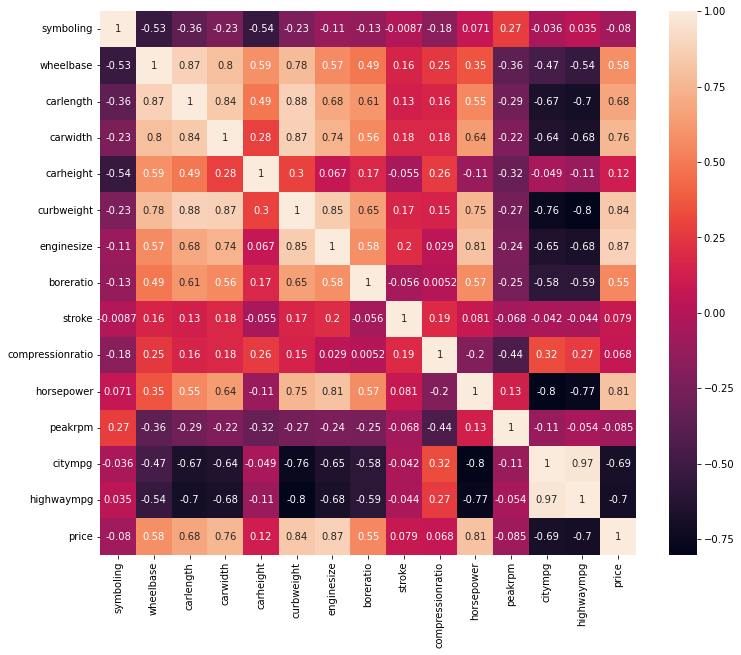

In [19]:
# checking the corelation in data
plt.figure(figsize=(12,10))
sns.heatmap(cars.corr(),annot=True)
plt.show()

Text(0, 0.5, 'citympg')

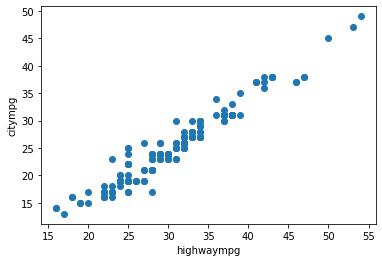

In [20]:
# scatter plot
plt.scatter(cars.highwaympg,cars.citympg)
plt.xlabel('highwaympg')
plt.ylabel('citympg')

In [21]:
# scatter plot
#plt.plot(cars.price,cars.enginesize)
#plt.xlabel('price')
#plt.ylabel('citympg')

In [22]:
# remove co-realted columns
# citympg and highwaympg co-realted and having values=0.97
# carwidth and wheelbase co-realted and having values=0.87
# curbweight and enginesize co-realted and having values=0.85
# carlength and wheelbase co-realted and having values=0.85

In [23]:
cars.drop(['citympg','carwidth','curbweight'],axis=1,inplace=True)

In [24]:
cars.drop(['wheelbase'],axis=1,inplace=True)

In [25]:
# Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
cars['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [26]:
cars['symboling'].replace([2,3],'risky',inplace=True)
cars['symboling'].replace([0,1],'modrate',inplace=True)
cars['symboling'].replace([-1,-2],'safe',inplace=True)

In [27]:
cars['symboling'].unique()


array(['risky', 'modrate', 'safe'], dtype=object)

In [28]:
cars['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

### Univariate Analysis

C:\Users\He336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='peakrpm'>

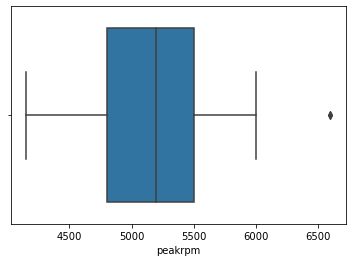

In [29]:
## Outlier check using boxplot
sns.boxplot(cars['peakrpm'])

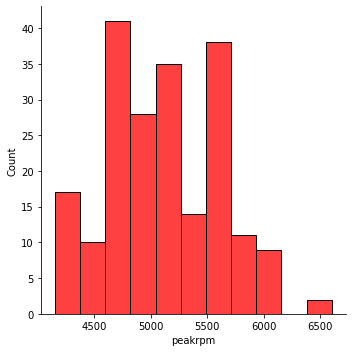

In [30]:
## Outlier check using distribution plot
sns.displot(cars['peakrpm'],color='red')

C:\Users\He336\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\He336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Price')

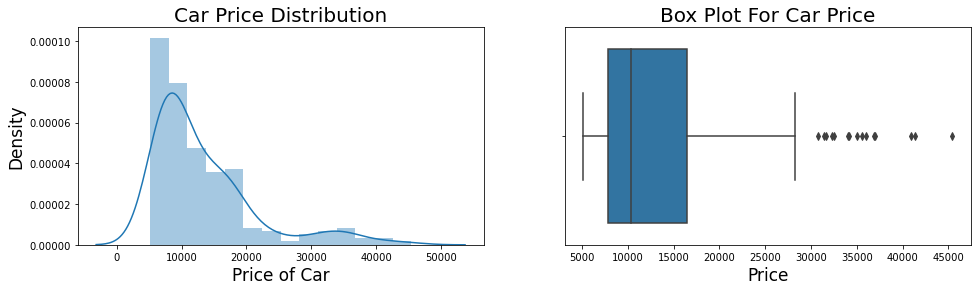

In [31]:
#Plotting the Price Column
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(cars['price'])
plt.title("Car Price Distribution", fontsize=20)
plt.xlabel("Price of Car", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(cars['price'])
plt.title("Box Plot For Car Price", fontsize=20)
plt.xlabel("Price", fontsize=17)

C:\Users\He336\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\He336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Price')

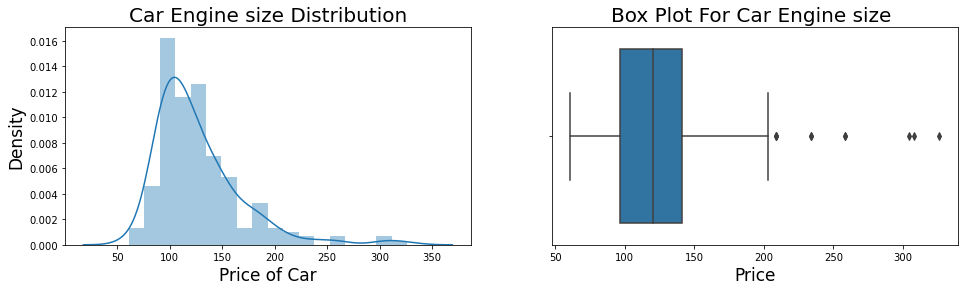

In [32]:
#Plotting the Price Column
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(cars['enginesize'])
plt.title("Car Engine size Distribution", fontsize=20)
plt.xlabel("Price of Car", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(cars['enginesize'])
plt.title("Box Plot For Car Engine size ", fontsize=20)
plt.xlabel("Price", fontsize=17)

In [33]:
cars.head()

,symboling,car_company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,risky,alfa-romero,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,27,13495.0
1,risky,alfa-romero,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,27,16500.0
2,modrate,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,26,16500.0
3,risky,audi,gas,std,four,sedan,fwd,front,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,30,13950.0
4,risky,audi,gas,std,four,sedan,4wd,front,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,22,17450.0


### Bivariate Analysis

<AxesSubplot:xlabel='enginetype', ylabel='price'>

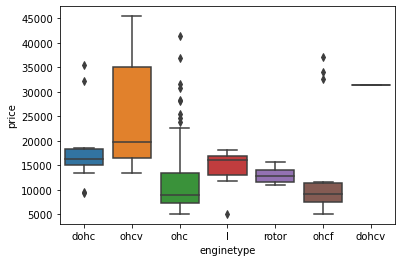

In [34]:
sns.boxplot(x='enginetype',y='price',data=cars)

ohcv having the higher range of price

<AxesSubplot:xlabel='fueltype', ylabel='price'>

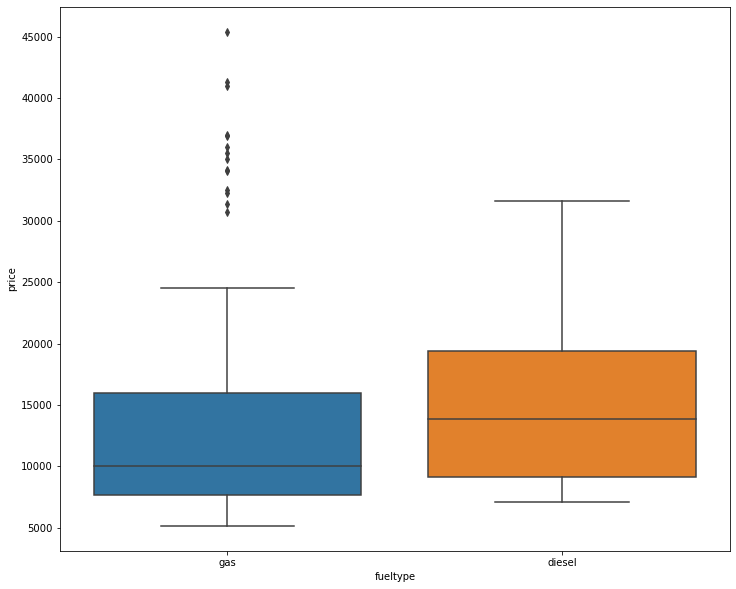

In [35]:
plt.figure(figsize=(12,10))
sns.boxplot(x='fueltype',y='price',data=cars)

<AxesSubplot:xlabel='enginetype', ylabel='price'>

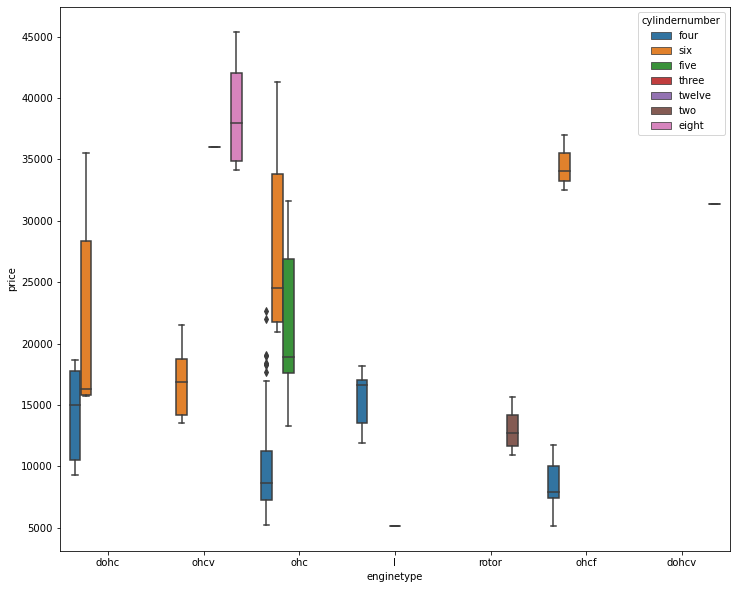

In [36]:
plt.figure(figsize=(12,10))
sns.boxplot(x='enginetype',y='price',hue='cylindernumber',data=cars)

### Insights-
    1. OHCV engine cars with 8 cylinder looks more expensive
    2. cylinder cars looks more effective on price 

C:\Users\He336\AppData\Local\Temp\ipykernel_16380\1775424049.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars.corr(),annot=True)


<AxesSubplot:>

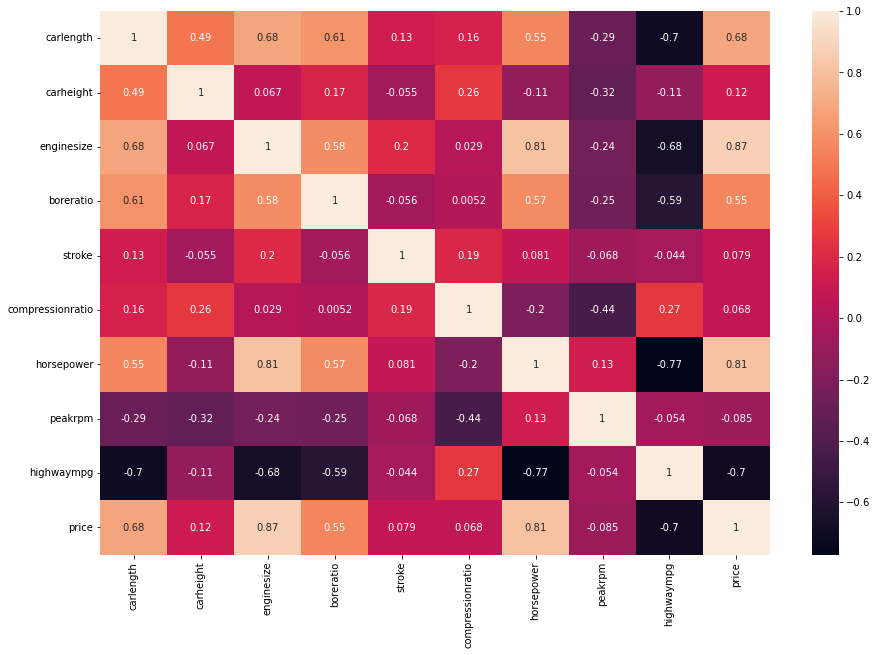

In [37]:
# Data correction
plt.figure(figsize=(15,10))
sns.heatmap(cars.corr(),annot=True)

### Corelation check between Independent and dependent feature
    Positive co-realted
        1. enginesize 0.87
        2. horsepower 0.81


In [38]:
cars.columns

Index(['symboling', 'car_company', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'carlength', 'carheight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg',
       'price'],
      dtype='object')

In [39]:
# median price of different companies cars
cars.groupby('car_company').price.median().sort_values(ascending=False)

car_company
jaguar         35550.0
buick          32892.0
porsche        32528.0
bmw            22835.0
volvo          18420.0
audi           17710.0
peugeot        16630.0
mercury        16503.0
alfa-romero    16500.0
saab           15275.0
mazda          10595.0
volkswagen      9737.5
renault         9595.0
toyota          9103.0
isuzu           8916.5
mitsubishi      8499.0
nissan          8249.0
subaru          7894.0
dodge           7609.0
plymouth        7609.0
honda           7295.0
chevrolet       6295.0
Nissan          5499.0
Name: price, dtype: float64

In [40]:
cars.head()

,symboling,car_company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,risky,alfa-romero,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,27,13495.0
1,risky,alfa-romero,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,27,16500.0
2,modrate,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,26,16500.0
3,risky,audi,gas,std,four,sedan,fwd,front,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,30,13950.0
4,risky,audi,gas,std,four,sedan,4wd,front,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,22,17450.0


# Encoding the categorical data to numbers
### unique category in data
    1. symboling -3 
    2. car_company -23
    3. fueltype -2
    4. aspiration  -2
    5. doornumber - 2
    6. carbody -5 
    7. drivewheel -3
    8. enginelocation -2 
    9. enginetype - 7
    10. cylindernumber -7 
    11. fuelsystem -8 

In [41]:
cars['fueltype']=cars['fueltype'].map({'gas':1,'diesel':0})
cars['aspiration']=cars['aspiration'].map({'std':1,'turbo':0})
cars['doornumber']=cars['doornumber'].map({'two':1,'four':0})
cars['enginelocation']=cars['enginelocation'].map({'front':1,'rear':0})
cars['symboling']=cars['symboling'].map({'risky':0,'modrate':1,'safe':2})

In [42]:
cars['cylindernumber'].replace('four',4,inplace=True)
cars['cylindernumber'].replace('six',6,inplace=True)
cars['cylindernumber'].replace('five',5,inplace=True)
cars['cylindernumber'].replace('three',3,inplace=True)
cars['cylindernumber'].replace('twelve',12,inplace=True)
cars['cylindernumber'].replace('two',2,inplace=True)
cars['cylindernumber'].replace('eight',8,inplace=True)

In [43]:
cars['symboling'].unique()

array([0, 1, 2], dtype=int64)

In [44]:
cars.describe(include='object')

,car_company,carbody,drivewheel,enginetype,fuelsystem
count,205,205,205,205,205
unique,23,5,3,7,8
top,toyota,sedan,fwd,ohc,mpfi
freq,32,96,120,148,94


In [45]:
copy_cars=cars

In [46]:
copy_cars.shape

(205, 21)

In [47]:
cat_col=['car_company','carbody','drivewheel','enginetype','fuelsystem']
for  col in cat_col:
    cat_features=pd.get_dummies(cars[col],drop_first=True)
    cars=pd.concat([cars,cat_features],axis=1)
    cars.drop([col],axis=1,inplace=True)
    
    

In [48]:
cars.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,1,1,1,1,168.8,48.8,4,130,3.47,2.68,9.0,111,5000,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,1,1,1,168.8,48.8,4,130,3.47,2.68,9.0,111,5000,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,171.2,52.4,6,152,2.68,3.47,9.0,154,5000,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,1,1,0,1,176.6,54.3,4,109,3.19,3.40,10.0,102,5500,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,1,176.6,54.3,5,136,3.19,3.40,8.0,115,5500,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [49]:
# train test split
from sklearn.model_selection import train_test_split
cars_train,cars_test=train_test_split(cars,train_size=0.7,test_size=0.3,random_state=10)

In [50]:
# scatter plot between dependent and independent variable
#plt.scatter(cars_train_min_max.carlength,cars_train_min_max.price)

In [51]:
y_train=cars_train.pop('price')
X_train=cars_train

In [52]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
cars_train_min_max=pd.DataFrame(min_max.fit_transform(X_train),columns=X_train.columns)

## Model Building using Linear regression 

In [53]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [54]:
# Feature selection using RFE
from sklearn.feature_selection import RFE
rfe=RFE(estimator=lm,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [55]:
cols=X_train.columns[rfe.support_]

In [56]:
cols

Index(['cylindernumber', 'audi', 'bmw', 'buick', 'jaguar', 'peugeot',
       'porsche', 'saab', 'volvo', 'hatchback', 'sedan', 'wagon', 'rotor',
       '4bbl', 'mfi'],
      dtype='object')

In [57]:
X_train_rfe=X_train[cols]

In [58]:
X_train_rfe.head()

,cylindernumber,audi,bmw,buick,jaguar,peugeot,porsche,saab,volvo,hatchback,sedan,wagon,rotor,4bbl,mfi
43,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
78,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0
143,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0
128,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [59]:
list(zip(X_train_rfe.columns,rfe.ranking_))

[('cylindernumber', 33),
 ('audi', 24),
 ('bmw', 3),
 ('buick', 32),
 ('jaguar', 10),
 ('peugeot', 28),
 ('porsche', 37),
 ('saab', 1),
 ('volvo', 26),
 ('hatchback', 36),
 ('sedan', 7),
 ('wagon', 35),
 ('rotor', 30),
 ('4bbl', 38),
 ('mfi', 31)]

### VIF implementation using stats model
 -- Its quantative value which tell features importance. If value < 5 then we will remove the insiginifance feature

In [60]:
import statsmodels.api as sm
# Add a constant
X_train_lm=sm.add_constant(X_train_rfe)
# fit the model
lr=sm.OLS(y_train,X_train_rfe).fit()

In [61]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              251.9
Date:                Fri, 03 Mar 2023   Prob (F-statistic):                    2.34e-86
Time:                        21:51:44   Log-Likelihood:                         -1339.5
No. Observations:                 143   AIC:                                      2707.
Df Residuals:                     129   BIC:                                      2748.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [62]:
# VIF dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i)
                          for i in range(len(X_train_rfe.columns))]
vif_data=vif_data.sort_values(by='VIF',ascending=False)
vif_data

C:\Users\He336\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
12,rotor,inf
13,4bbl,inf
0,cylindernumber,17.144792
10,sedan,8.569509
9,hatchback,5.916140
11,wagon,2.744471
3,buick,1.491712
6,porsche,1.300299
2,bmw,1.269238
8,volvo,1.139743


In [63]:
# Droping the variable compressionratio as it has high VIF values
#X_train_rfe.drop('highwaympg',axis=1,inplace=True)

In [64]:
lr=sm.OLS(y_train,X_train_rfe).fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              251.9
Date:                Fri, 03 Mar 2023   Prob (F-statistic):                    2.34e-86
Time:                        21:51:44   Log-Likelihood:                         -1339.5
No. Observations:                 143   AIC:                                      2707.
Df Residuals:                     129   BIC:                                      2748.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [65]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i)
                          for i in range(len(X_train_rfe.columns))]
vif_data=vif_data.sort_values(by='VIF',ascending=False)
vif_data

C:\Users\He336\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
12,rotor,inf
13,4bbl,inf
0,cylindernumber,17.144792
10,sedan,8.569509
9,hatchback,5.916140
11,wagon,2.744471
3,buick,1.491712
6,porsche,1.300299
2,bmw,1.269238
8,volvo,1.139743


In [66]:
# Droping the variable compressionratio as it has high VIF values
#X_train_rfe.drop('buick',axis=1,inplace=True)

In [67]:
lr=sm.OLS(y_train,X_train_rfe).fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              251.9
Date:                Fri, 03 Mar 2023   Prob (F-statistic):                    2.34e-86
Time:                        21:51:44   Log-Likelihood:                         -1339.5
No. Observations:                 143   AIC:                                      2707.
Df Residuals:                     129   BIC:                                      2748.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [68]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i)
                          for i in range(len(X_train_rfe.columns))]
vif_data=vif_data.sort_values(by='VIF',ascending=False)
vif_data

C:\Users\He336\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
12,rotor,inf
13,4bbl,inf
0,cylindernumber,17.144792
10,sedan,8.569509
9,hatchback,5.916140
11,wagon,2.744471
3,buick,1.491712
6,porsche,1.300299
2,bmw,1.269238
8,volvo,1.139743


In [69]:
# Droping the variable compressionratio as it has high VIF values
X_train_rfe.drop(['rotor','audi','jaguar','bmw'],axis=1,inplace=True)

C:\Users\He336\AppData\Local\Temp\ipykernel_16380\3858278055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop(['rotor','audi','jaguar','bmw'],axis=1,inplace=True)


In [70]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i)
                          for i in range(len(X_train_rfe.columns))]
vif_data=vif_data.sort_values(by='VIF',ascending=False)
vif_data

,feature,VIF
0,cylindernumber,15.070730
7,sedan,8.336676
6,hatchback,5.380315
8,wagon,2.579761
1,buick,1.393048
3,porsche,1.263718
5,volvo,1.119265
2,peugeot,1.110182
4,saab,1.062855
9,4bbl,1.047159


In [71]:
# Add a constant
X_train_lm=sm.add_constant(X_train_rfe)
# fit the model
lr=sm.OLS(y_train,X_train_rfe).fit()

In [72]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              154.0
Date:                Fri, 03 Mar 2023   Prob (F-statistic):                    1.27e-69
Time:                        21:51:45   Log-Likelihood:                         -1390.7
No. Observations:                 143   AIC:                                      2803.
Df Residuals:                     132   BIC:                                      2836.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

## Test the model

In [73]:
y_test=cars_test.pop('price')

In [74]:
cars_test_min_max=pd.DataFrame(min_max.fit_transform(cars_test),columns=cars_test.columns)
X_test=cars_test

In [75]:
X_test.shape

(62, 56)

In [76]:
X_test=X_test[list(X_train_rfe.columns)]

In [77]:
X_test.head()

,cylindernumber,buick,peugeot,porsche,saab,volvo,hatchback,sedan,wagon,4bbl,mfi
131,4,0,0,0,0,0,1,0,0,0,0
117,4,0,1,0,0,0,0,1,0,0,0
63,4,0,0,0,0,0,0,1,0,0,0
56,2,0,0,0,0,0,1,0,0,1,0
49,12,0,0,0,0,0,0,1,0,0,0


In [78]:
y_pred=lr.predict(X_test)

In [79]:
y_test.shape

(62,)

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6171800255044472

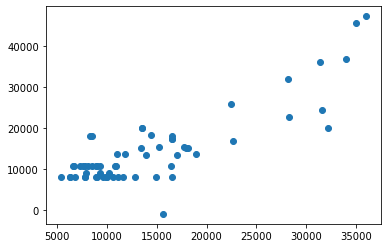

In [81]:
plt.scatter(y_test,y_pred)

C:\Users\He336\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\He336\anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\He336\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\He336\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:>

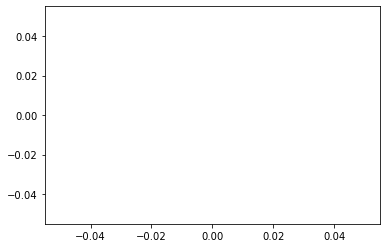

In [82]:
# Distribution plot for error analysis
sns.distplot((y_train-y_pred),bins=20)

In [83]:
import joblib
joblib.dump(lr,'model.pkl')

['model.pkl']

In [84]:
# model implementation

In [85]:
# model prediction

In [86]:
# Final Analysis and Recommendations

In [87]:
# ppt creations